<img src="Images/logo.jpg" width="600">

## <center> <span style="color:darkred"> Exercitation_04 </span> </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from scipy import constants

*In this exercitation the executable is **MolDyn.exe** and it requires an input file, **input.dat**. There are three different input files in the directory (**.solid**, **.liquid**, **.gas**), the ones I used in my simulations for the three phases. The user can easily change the parameters in these files, and then copy them in the input file **.dat** which will be read in the simulation.  
There are also other files: **config.fcc** contains the initial configuration of a FCC crystal, and I used it (copying in **config.0**) at the beginning of my simulations. The file **config.final** contains, after the simulation, the final configuration reached.  
The files **old.0** and **old.final** have a similar role, described in the first part of this exercitation.  
The results of the simulations go in the directory* `Risultati`*, and then the user can move them in the subdirectory of the respective phase, when he considers them satisfactory.*

### <font color="blue"> Part 01

I modified the code adding the option to use the old position too from the file `old.0`: this option can be chosen with the command *old* in the input file while  
*actual* is the opposite option.  
The positions $\vec{r}(t)$ are loaded from `config.0`. The old positions $\vec{r}(t-dt)$ are loaded from `old.0` in the *old* case, or generated with random velocities in the *actual* case.

Then, I added the function *Eq_Temp()*, which rescales the positions to reach a desired temperature $T^{\star}$, with the procedure described and suggested in the exercise.  
I also did a function *Termalizzazione()* which, starting from a different temperature $T_{start}$, evolves towards the desired temperature. The definition of $T_{start}$ and the number of steps had been a delicate passage, but finally I got the best thermalization of the system with this function.  
After some run, I fixed:  
- Solid phase:   $\quad T_{start}= 1.45 \quad $,   $\quad 10000$ steps   $\quad \Rightarrow$   $\quad T^*=0.795953 $
- Liquid phase:   $\quad T_{start}= 1.97 \quad $,   $\quad 15000$ steps   $\quad \Rightarrow$   $\quad T^*=1.10985 $
- Gas phase:   $\, \quad T_{start}= 0.96 \quad $,   $\quad 30000$ steps   $\quad \Rightarrow$   $\quad T^*=1.19806$

In the plots below, I show the results of the equilibration of the systems: it confirms that after a some run the value of temperature is near to the one desired and then oscillates around it.

In [3]:
x = np.arange(1,31)
data_solid= ascii.read('P1-3/Risultati/Solid_phase/termal.dat',format='no_header')    #loading solid data
eq_temp_sol= data_solid['col1']
data_liquid= ascii.read('P1-3/Risultati/Liquid_phase/termal.dat',format='no_header')  #loading liquid data
eq_temp_liq= data_liquid['col1']
data_gas= ascii.read('P1-3/Risultati/Gas_phase/termal.dat',format='no_header')        #loading gas data
eq_temp_gas= data_gas['col1']

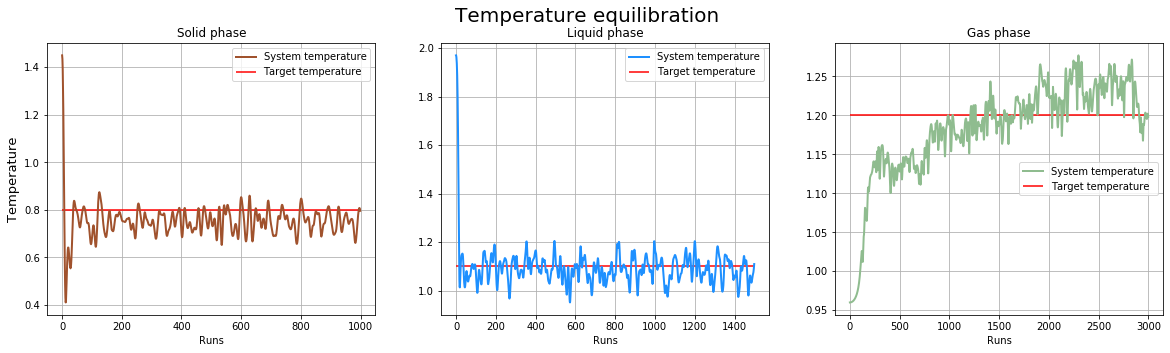

In [16]:
x=range(len(eq_temp_liq))
x1=range(len(eq_temp_sol))
plt.figure(figsize=(20,5))
plt.suptitle('Temperature equilibration', fontsize = 20)

plt.subplot(131)
plt.title('Solid phase')
plt.plot(x1,eq_temp_sol, color = 'sienna',linewidth=2 , label='System temperature')
plt.hlines(0.8, 0, len(eq_temp_sol) , label='Target temperature', color='r')
plt.xlabel('Runs')
plt.ylabel('Temperature', fontsize = 13)
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Liquid phase')
plt.plot(x,eq_temp_liq, color = 'dodgerblue',linewidth=2 ,label='System temperature')
plt.hlines(1.1, 0, len(eq_temp_liq) , label='Target temperature', color='r')
plt.xlabel('Runs')
#plt.ylabel('Temperature')
plt.grid()
plt.legend()

plt.subplot(133)
plt.title('Gas phase')
plt.plot(range(len(eq_temp_gas)),eq_temp_gas, color = 'darkseagreen',linewidth=2,label='System temperature')
plt.hlines(1.2, 0,len(eq_temp_gas), label='Target temperature',color='r')
plt.xlabel('Runs')
#plt.ylabel('Temperature')
plt.grid()
plt.legend(loc=7)

plt.show()

### <font color="blue"> Part 02

Here, I added to the MD simulation the possibility to evalue the uncertainties with the blocking method. I add a function *Measure_ave()* in which I perform the blocking method (with $N_{blocks} = 100$ fixed in `MolDyn_NVE.h`).
    
The output files are `ave_epot.out`, `ave_ekin.out`, `ave_etot.out`, `ave_temp.out`.

### <font color="blue"> Part 03

Finally, I perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)  

I fixed (in the input file) the step of the algorithm  $\tau^\star = 0.0005$ and the number of steps $n_{steps}=10^4$. The observables are evalued every 10 steps, i.e. finally I have 1000 evaluations.

In the next mirror, there are the constants I used to express energy and temperature in SI units. I chose (even if energy is in Joule in the SI) to express the energies in milli electronVolt, more appropriated when talking of molecules. However, one can easily get the plots in Joule deleting the part **/e*1E3** in the plots below.

In [5]:
#costants
sig = 0.34E-9
kb = constants.value('Boltzmann constant') #[J/K]
amu = constants.value('atomic mass constant') #[kg]
eps = 120 * kb    # [J]
m = 39.948 * amu  # [kg]
e = constants.value('elementary charge')

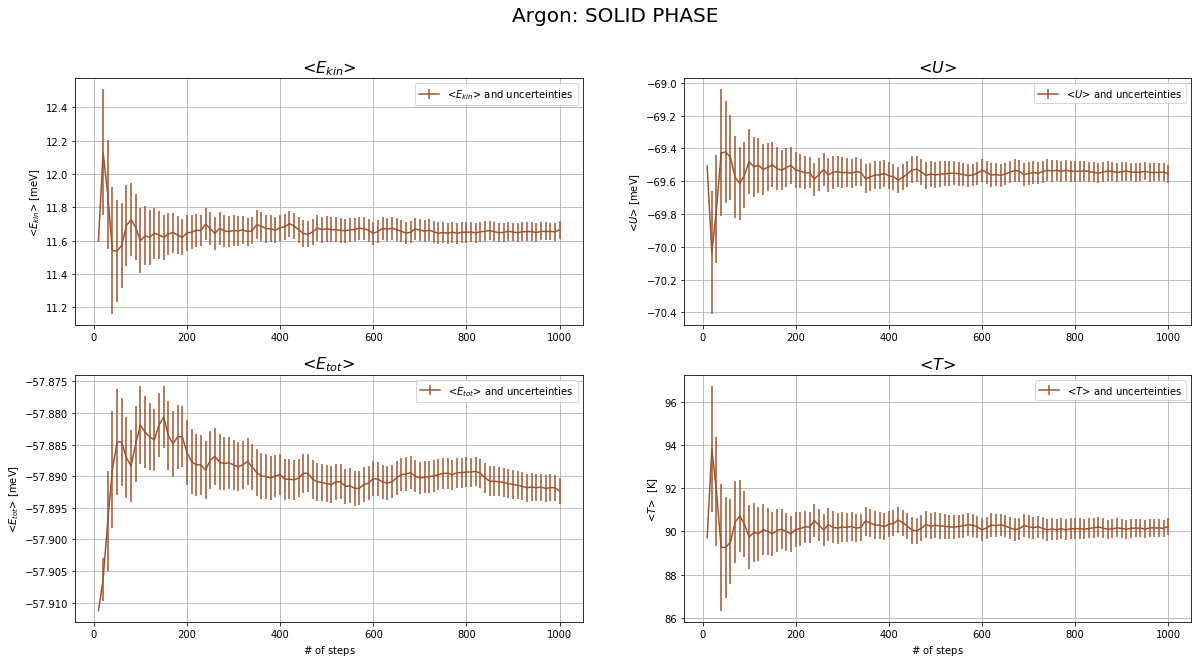

In [7]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: SOLID PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$E_{kin}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Solid_phase/ave_ekin.out', format='no_header')
x = data['col1'] 
Ekin = data['col2'] #vector with mean
err_Ekin = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Ekin/e*1E3, eps * err_Ekin/e*1E3,  color = 'sienna' , label= '<$E_{kin}$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{kin}$> [meV]')
plt.legend()

plt.subplot(222)
plt.title('<$U$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Solid_phase/ave_epot.out', format='no_header')
x = data['col1'] 
U = data['col2'] #vector with mean
err_U = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'sienna' , label= '<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U$> [meV]')
plt.legend()

plt.subplot(223)
plt.title('<$E_{tot}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Solid_phase/ave_etot.out', format='no_header')
x = data['col1'] 
Etot = data['col2'] #vector with mean
err_Etot = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Etot / e*1E3, eps * err_Etot/e*1E3,  color = 'sienna' , label= '<$E_{tot}$> and uncerteinties' )
plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{tot}$> [meV]')
plt.legend()

plt.subplot(224)
plt.title('<$T$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Solid_phase/ave_temp.out', format='no_header')
x = data['col1'] 
T = data['col2'] #vector with mean
err_T = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps/kb *T, eps/kb *err_T,  color = 'sienna' , label= '<$T$> and uncerteinties' )
plt.xlabel('$\#$ of steps')
plt.ylabel('<$T$>  [K]')
plt.legend()

plt.show()

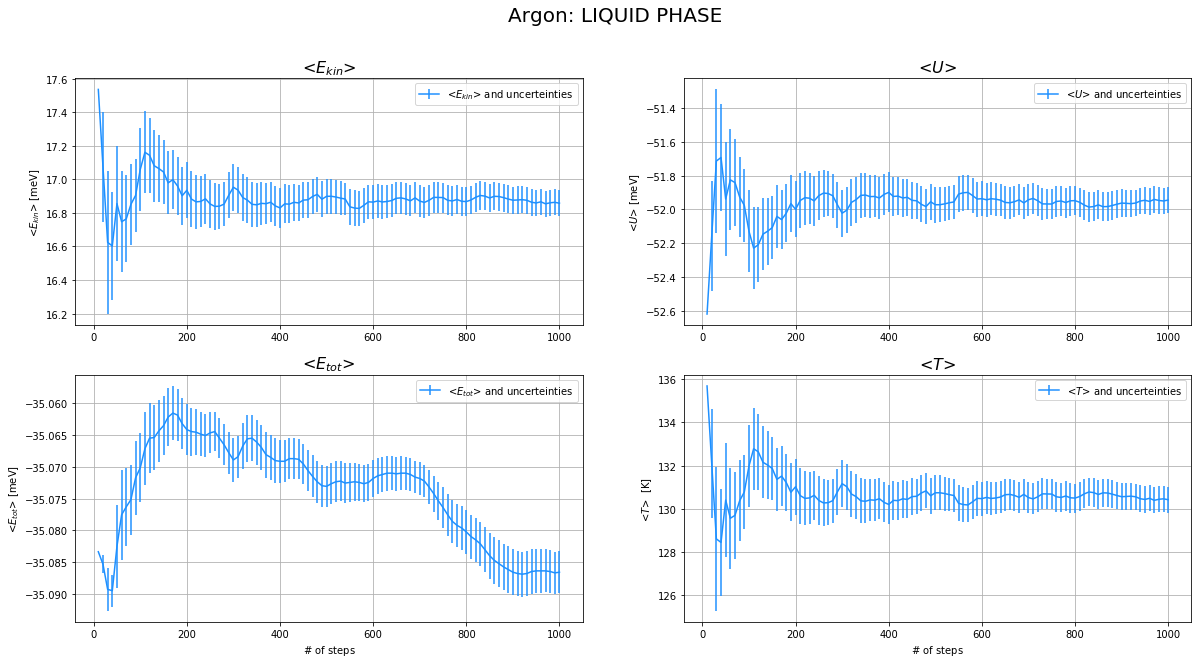

In [8]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: LIQUID PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$E_{kin}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Liquid_phase/ave_ekin.out', format='no_header')
x = data['col1'] 
Ekin = data['col2'] #vector with mean
err_Ekin = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Ekin/e*1E3, eps * err_Ekin/e*1E3,  color = 'dodgerblue' , label= '<$E_{kin}$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{kin}$> [meV]')
plt.legend()

plt.subplot(222)
plt.title('<$U$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Liquid_phase/ave_epot.out', format='no_header')
x = data['col1'] 
U = data['col2'] #vector with mean
err_U = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'dodgerblue' , label= '<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U$> [meV]')
plt.legend()

plt.subplot(223)
plt.title('<$E_{tot}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Liquid_phase/ave_etot.out', format='no_header')
x = data['col1'] 
Etot = data['col2'] #vector with mean
err_Etot = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Etot / e*1E3, eps * err_Etot/e*1E3,  color = 'dodgerblue' , label= '<$E_{tot}$> and uncerteinties' )
plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{tot}$> [meV]')
plt.legend()

plt.subplot(224)
plt.title('<$T$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Liquid_phase/ave_temp.out', format='no_header')
x = data['col1'] 
T = data['col2'] #vector with mean
err_T = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps/kb *T, eps/kb *err_T,  color = 'dodgerblue' , label= '<$T$> and uncerteinties' )
plt.xlabel('$\#$ of steps')
plt.ylabel('<$T$>  [K]')
plt.legend()

plt.show()

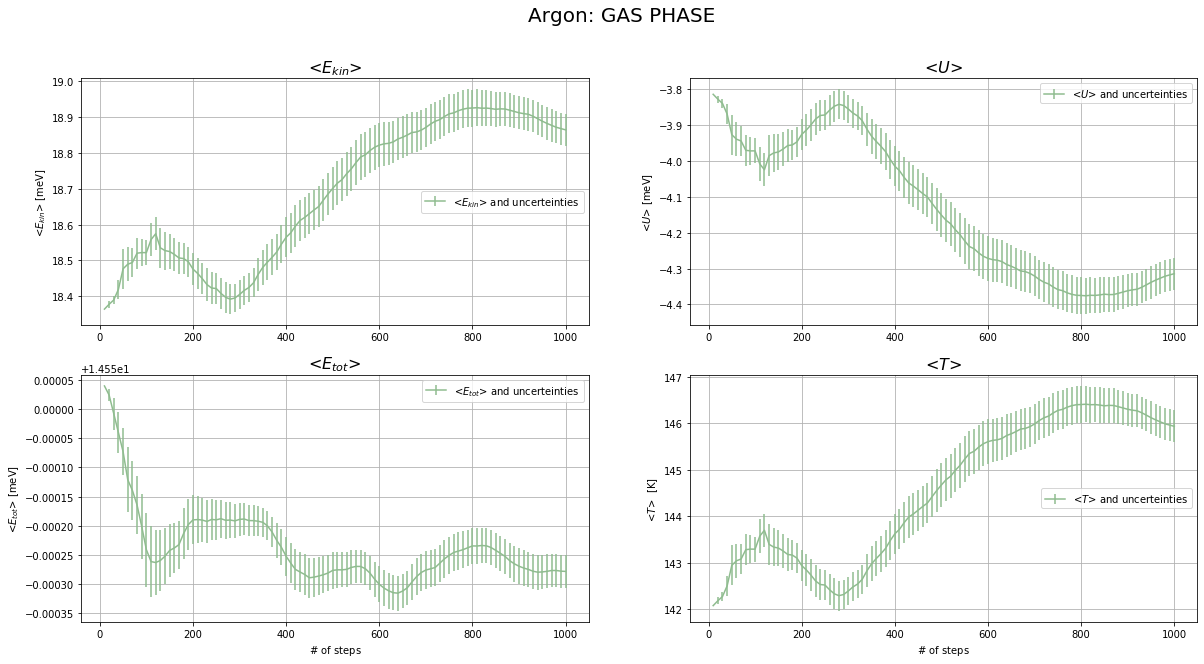

In [15]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: GAS PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$E_{kin}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Gas_phase/ave_ekin.out', format='no_header')
x = data['col1'] 
Ekin = data['col2'] #vector with mean
err_Ekin = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Ekin/e*1E3, eps * err_Ekin/e*1E3,  color = 'darkseagreen' , label= '<$E_{kin}$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{kin}$> [meV]')
plt.legend(loc=7)

plt.subplot(222)
plt.title('<$U$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Gas_phase/ave_epot.out', format='no_header')
x = data['col1'] 
U = data['col2'] #vector with mean
err_U = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'darkseagreen' , label= '<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U$> [meV]')
plt.legend()

plt.subplot(223)
plt.title('<$E_{tot}$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Gas_phase/ave_etot.out', format='no_header')
x = data['col1'] 
Etot = data['col2'] #vector with mean
err_Etot = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * Etot / e*1E3, eps * err_Etot/e*1E3,  color = 'darkseagreen' , label= '<$E_{tot}$> and uncerteinties' )
plt.xlabel('$\#$ of steps')
plt.ylabel('<$E_{tot}$> [meV]')
plt.legend()

plt.subplot(224)
plt.title('<$T$>', fontsize = 16)
data= ascii.read('P1-3/Risultati/Gas_phase/ave_temp.out', format='no_header')
x = data['col1'] 
T = data['col2'] #vector with mean
err_T = data['col3'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps/kb *T, eps/kb *err_T,  color = 'darkseagreen' , label= '<$T$> and uncerteinties' )
#plt.hlines(0.5, 0, 1E6)
plt.xlabel('$\#$ of steps')
plt.ylabel('<$T$>  [K]')
plt.legend(loc=7)

plt.show()

Final observations:  
- In all the three phases, after the first steps, the total energy should be almost constant. This is what we could expect, because the Verlet algorithm is invariant for time reversal, and this guarantees the conservation of total energy even for long times. I can observe it well in the solid phase, while it requires more steps in liquid and gas phases;  
- The different phases are characterized by different ratios of kinetic and potential energy. The ratios $\frac{<U>}{E_{kin}}$ are about 10, 3 and 0.2 respectively for solid, liquid and gas phase. 